# NumPy

Numpy is short for numerical Python, and is essential to most Python workflows. While Python does actually provided an Array type in the `array` module, it is rarely used because it only supports 1D arrays and also lacks much of the rich functionality that makes `ndarrays` so fundamental to much of the Python infrastructure.




Numpy provides an efficient representation of arrays, matrices and tensors with a range of numerical operations defined on for the object type.

Numpy's main object is the homogeneuous multidimensional array. It is a table of elements (usually numeric), all of the same type and indexed by a tuple of non-negative integers. In numpy (and Pandas), dimensions are refered to as axes.

In [1]:
import numpy as np

# Additional packages we will use
import matplotlib.pyplot as plt
import seaborn as sns
import sys

## Declaration

There are many ways to make an array. One of the most common is converting from a list.

In [4]:
array = np.array([1.5, 3.2, 7.6])    # Make an array from a list
array

array([1.5, 3.2, 7.6])

Another is using the `arange` method. 

It takes the form **$numpy.arange([start, ]stop, [step, ]dtype=None)$**

**REMEMBER**: Arguments in `[]` are optional! This is standard notation in the Python docs.

In [5]:
range_arr = np.arange(15)
range_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

The `arange` function has additional value beyond declaring arrays. 

You can use it to make your iteration faster! Because the implementation of a loop or comprehension in Python is based on the type of iterator object used in the call, often using `arange` instead of `range` can move your looping out of base Python and into 'NumPy Space', where the iteration instead gets executed in highly optimzed C code.

**TL;DR** - Use `arange` instead of `range` when iterating over a numeric sequence, it is faster!

There are a number of additional other declaration methods for different use cases, we will get into them later.

## Array Attributes

The `ndarray` type in NumPy comes with a variety of built-in properties describing the object.

In [6]:
range_arr.ndim    # How many dimensions does the array have?

1

In [7]:
range_arr.shape    # What are the dimensions of the array? (rows, columns, ...)

(15,)

In [8]:
range_arr.dtype    # What datatype are the array elements?

dtype('int64')

In [9]:
range_arr.itemsize    # How big is on array element?

8

In [10]:
range_arr.size    # How many array elements are there?

15

In [11]:
range_arr.nbytes    # How big is the array in bytes?

120

In [12]:
range_arr.data    # Returns a buffer object containing the array data

## Slicing

The same powerful *slicing* syntax that works for `strings`, `lists` and other sequence types also work for `ndarrays`.


**RECALL:** Slicing syntax follows the $start:stop:step$ pattern. It returns a `view` object and allows modification of the original array by *refrence*.

In [13]:
range_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Suppose you want to retrieve 3, 4, 5. How would you do it?

In [14]:
range_arr[3:6]

array([3, 4, 5])

How about the number 2, 5, 8?

In [15]:
range_arr[2:9:3]

array([2, 5, 8])

What about 13, 11, 9, 7?

The slicing syntax is simple for 1D arrays, but can get complicated (and powerful) when working with multi-dimensional arrays. We will revist this after discussion different ways to intialize `arrays`.

## Intialization

It is advantageous to predeclare large arrays in situations where you know the size that you need. There are several NumPy methods that make this easy to do! 

By predeclaring your array, you avoid the memory allocations that take place as the array grows; this speeds up your code, especially for large arrays.

For more information see: [Array creation routines documentation](https://numpy.org/doc/stable/reference/routines.array-creation.html)

### Arrays of zeros: 

$numpy.zeros(shape, dtype=float, order='C')$

**ASIDE:** What does the argument `order` do?

>Row vs Column Major Order:
>  - All arrays in are stored in memory contiguously
>  - The 'shape' of an array does not change the representation in memory, it just changes the way the array >is indexed
>  - There are two organization themes:
>  
>  ![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Row_and_column_major_order.svg/170px-Row_and_column_major_order.svg.png)
> 
>There is an array property that lets use see details about the internal representation of an array

In [23]:
zero_array = np.zeros((2, 5, 3))

zero_array.shape

In [24]:
zero_array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [25]:
zero_array.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

Here, *C_CONTIGUOUS* represents column-major order and *F_CONTIGUOUS* is for row-major order.

### Arrays of ones:

$numpy.ones(shape, dtype=None, order='C')$

In [26]:
ones_array = np.ones((2, 3, 4), dtype='int8', order='F')

In [27]:
ones_array

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int8)

In [28]:
ones_array.flags    # Now our array is in row-major order

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

Understanding the internal representation of arrays helps us peel back the simplicity of Python syntax and get a deeper understanding of how the language works. Row vs column major order is utilized in NumPy to perform by reference transposition of matrix and tensor objects - in this operation the underlyling data is not changed, just the order of the index.

In [29]:
print(ones_array.T) # .transpose()

[[[1 1]
  [1 1]
  [1 1]]

 [[1 1]
  [1 1]
  [1 1]]

 [[1 1]
  [1 1]
  [1 1]]

 [[1 1]
  [1 1]
  [1 1]]]


In [30]:
ones_array.T.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

We can see here that a transpose operation (`.T`) inverts row vs column major order. Similar to slicing, it returns a *view* of the object, not a copy. Thus modifying a transposed array will change the original array.

In [31]:
ones_array.T[1, 0, 1] = 2

In [32]:
ones_array

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 2, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int8)

### Arrays With Custom Values:

$numpy.full(shape, fill\_value, dtype=None, order='C')$

In [33]:
custom_array = np.full((2, 3), 0.+0.j)    # An array with complex numbers

In [34]:
custom_array

array([[0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j]])

In [35]:
custom_array.dtype

dtype('complex128')

We can also replicate the shape of other arrays using `np.full_like`.

In [36]:
like_ones_array = np.full_like(ones_array, 4)

In [37]:
like_ones_array

array([[[4, 4, 4, 4],
        [4, 4, 4, 4],
        [4, 4, 4, 4]],

       [[4, 4, 4, 4],
        [4, 4, 4, 4],
        [4, 4, 4, 4]]], dtype=int8)

In [38]:
like_ones_array.shape == ones_array.shape

True

For most of the initialization methods discussed, there exits a simliar `*_like` method for copying the shape of existing arrays.

## Numerical Sequences

We already discussed on way to declare numerical sequences in the **Declaration** section. What was it?

In [ ]:
# declare sequences question?

If we want an array from 1 to 5 by 0.15, how do we declare it?

In [41]:
arr = np.arange(1, 6, 0.15)
arr

array([1.  , 1.15, 1.3 , 1.45, 1.6 , 1.75, 1.9 , 2.05, 2.2 , 2.35, 2.5 ,
       2.65, 2.8 , 2.95, 3.1 , 3.25, 3.4 , 3.55, 3.7 , 3.85, 4.  , 4.15,
       4.3 , 4.45, 4.6 , 4.75, 4.9 , 5.05, 5.2 , 5.35, 5.5 , 5.65, 5.8 ,
       5.95])

### Evenly Spaced Numbers Over An Interval

Can be declared using **$linspace(start, stop[, num, endpoint, …])$**.

Say we want a sequence from 1 to 5 in intervals of divided into 13 equal size chunks?

In [42]:
np.linspace(1, 5, 13)

array([1.        , 1.33333333, 1.66666667, 2.        , 2.33333333,
       2.66666667, 3.        , 3.33333333, 3.66666667, 4.        ,
       4.33333333, 4.66666667, 5.        ])

What does the `endpoint` argument do?

In [43]:
np.linspace(1, 5, 13, endpoint=False)

array([1.        , 1.30769231, 1.61538462, 1.92307692, 2.23076923,
       2.53846154, 2.84615385, 3.15384615, 3.46153846, 3.76923077,
       4.07692308, 4.38461538, 4.69230769])

We can see that `endpoint` is a boolean argument which makes the returned array *exclusive* of the `stop` value.

### Log Intervals

Can be declared using **$logspace(start, stop[, num, endpoint, base, …])$**

In [44]:
np.logspace(1, 3, base=2)

array([2.        , 2.05739147, 2.11642982, 2.17716233, 2.2396376 ,
       2.30390564, 2.37001791, 2.43802731, 2.50798829, 2.57995685,
       2.65399061, 2.73014882, 2.80849244, 2.88908419, 2.97198858,
       3.05727197, 3.14500263, 3.23525079, 3.32808868, 3.42359063,
       3.52183307, 3.62289466, 3.72685628, 3.83380115, 3.94381489,
       4.05698555, 4.17340372, 4.2931626 , 4.41635805, 4.54308869,
       4.67345595, 4.8075642 , 4.94552078, 5.08743612, 5.23342383,
       5.38360077, 5.53808714, 5.69700662, 5.8604864 , 6.02865736,
       6.2016541 , 6.37961511, 6.56268285, 6.75100385, 6.94472885,
       7.14401294, 7.34901563, 7.55990103, 7.77683793, 8.        ])

For `logspace`, start and stop represent `base ** start` to `base ** stop`.

In [45]:
log_array = np.logspace(1, 5, 20, base=3)

In [46]:
log_array

array([  3.        ,   3.78066185,   4.764468  ,   6.0042808 ,
         7.56671845,   9.53573458,  12.01712931,  15.1442341 ,
        19.08507602,  24.05140626,  30.31007801,  38.19738518,
        48.13713227,  60.66340648,  76.44927548,  96.34295303,
       121.4133756 , 153.00763898, 192.82338103, 243.        ])

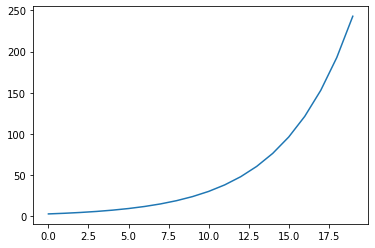

In [47]:
plt.plot(log_array)

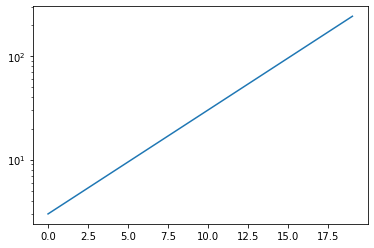

In [48]:
plt.plot(log_array, )
plt.yscale('log')

## Reshaping and Casting Arrays

Similar to the R functions for reshaping `data.frame`s, NumPy provides simple methods to customize the shape of an array.

In [ ]:
flat_array = np.linspace(1, 5, 6)

In [ ]:
flat_array

In [ ]:
flat_array.shape

In [ ]:
flat_array.reshape((3, 2))

In [ ]:
flat_array

## Part 4: Numpy

Numpy is short for numerical Python, and is essential to most Python workflows. While Python does actually provided an Array type in the `array` module, it is rarely used because it only supports 1D arrays and also lacks much of the rich functionality that makes `ndarrays` so fundamental to much of the Python infrastructure.




Numpy provides an efficient representation of arrays, matrices and tensors with a range of numerical operations defined on for the object type.

Numpy's main object is the homogeneuous multidimensional array. It is a table of elements (usually numeric), all of the same type and indexed by a tuple of non-negative integers. In numpy (and Pandas), dimensions are refered to as axes.

In [ ]:
import numpy as np
import sys

## Declaration

There are many ways to make an array. One of the most common is converting from a list.

In [ ]:
array = np.array([1.5, 3.2, 7.6]) # Make an array from a list
array

Another is using the `arange` method. It takes the form **$numpy.arange([start, ]stop, [step, ]dtype=None)$**

**REMEMBER**: Arguments in `[]` are optional! This is standard notation in the Python docs.

In [ ]:
range_arr = np.arange(15)
range_arr

The `arange` function has additional value beyond declaring arrays. 

You can use it to make your iteration faster! Because the implementation of a loop or comprehension in Python is based on the type of iterator object used in the call, often using `arange` instead of `range` can move your looping out of base Python and into 'NumPy Space', where the iteration instead gets executed in highly optimzed C code.

**TL;DR** - Use `arange` instead of `range` when iterating over a numeric sequence, it is faster!

There are a number of additional other declaration methods for different use cases, we will get into them later.

### Array Attributes

The `ndarray` type in NumPy comes with a variety of built-in properties describing the object.

In [ ]:
range_arr.ndim    # How many dimensions does the array have?

In [ ]:
range_arr.shape    # What are the dimensions of the array? (rows, columns, ...)

In [ ]:
range_arr.dtype    # What datatype are the array elements?

In [ ]:
range_arr.itemsize    # How big is on array element?

In [ ]:
range_arr.size    # How many array elements are there?

In [ ]:
range_arr.nbytes    # How big is the array in bytes?

In [ ]:
range_arr.data    # Returns a buffer object containing the array data

### Slicing

The same powerful *slicing* syntax that works for `strings`, `lists` and other sequence types also work for `ndarrays`.


**RECALL:** Slicing syntax follows the $start:stop:step$ pattern.

In [ ]:
range_arr

Suppose you want to retrieve 3, 4, 5. How would you do it?

In [ ]:
range_arr[]

How about the number 2, 5, 8?

In [ ]:
range_arr[]

What about 13, 11, 9, 7?

In [ ]:
range_arr[]

The slicing syntax is simple for 1D arrays, but can get complicated (and powerful) when working with multi-dimensional arrays. We will revist this after discussion different ways to intialize `arrays`.

### Intialization

It is advantageous to predeclare large arrays in situations where you know the size that you need. There are several NumPy methods that make this easy to do! 

By predeclaring your array, you avoid the memory allocations that take place as the array grows; this speeds up your code, especially for large arrays.

#### Arrays of zeros: 

$numpy.zeros(shape, dtype=float, order='C')$

**ASIDE:** What does the argument `order` do?


In [ ]:
zero_array = np.zeros((2, 5, 3))

zero_array.shape

In [ ]:
zero_array

**\*ASIDE:**
Row vs Column Major Order:
  - All arrays in are stored in memory contiguously
  - The 'shape' of an array does not change the representation in memory, it just changes the way the array is indexed
  - There are two organization themes:
  
  ![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Row_and_column_major_order.svg/170px-Row_and_column_major_order.svg.png)
  
There is an array property that lets use see details about the internal representation of an array:

In [ ]:
zero_array.flags

Here, *C_CONTIGUOUS* represents column-major order and *F_CONTIGUOUS* is for row-major order.

#### Arrays of ones:

$numpy.ones(shape, dtype=None, order='C')$

In [ ]:
ones_array = np.ones((2, 3, 4), dtype='int8', order='F')

In [ ]:
ones_array

In [ ]:
ones_array.flags    # Now our array is in row-major order

Understanding the internal representation of arrays helps us peel back the simplicity of Python syntax and get a deeper understanding of how the language works. Row vs column major order is utilized in NumPy to perform by reference transposition of matrix and tensor objects - in this operation the underlyling data is not changed, just the order of the index.

In [ ]:
print(ones_array.T)

In [ ]:
ones_array.T.flags

We can see here that a transpose operation (`.T`) inverts row vs column major order. Similar to slicing, it returns a *view* of the object, not a copy. Thus modifying a transposed array will change the original array.

In [ ]:
ones_array.T[1, 0, 1] = 2

In [ ]:
ones_array

#### Arrays With Custom Values:

$numpy.full(shape, fill\_value, dtype=None, order='C')$

In [ ]:
custom_array = np.full((2, 3), 0.+0.j)    # An array with complex numbers

In [ ]:
custom_array

In [ ]:
custom_array.dtype

We can also replicate the shape of other arrays using `np.full_like`.

In [ ]:
like_ones_array = np.full_like(ones_array, 4)

In [ ]:
like_ones_array

In [ ]:
like_ones_array.shape == ones_array.shape

## Reshaping and Casting Arrays

### Reshaping

In [49]:
flat_array = np.linspace(1, 10, 6)

In [50]:
flat_array

array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. ])

In [51]:
flat_array.reshape(2, 3)

array([[ 1. ,  2.8,  4.6],
       [ 6.4,  8.2, 10. ]])

In [52]:
flat_array

array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. ])

We can see that the original array is unmodified. Similar to transposition with `.T`, the object returned by `.reshape` is a view of the original array. To keep the modified array we must assign it to a new variable.

In [53]:
matrix = flat_array.reshape(2, 3)

In [54]:
matrix

array([[ 1. ,  2.8,  4.6],
       [ 6.4,  8.2, 10. ]])

There is a potential issue here... Can you find it?

Reference semantics are powerful and memory efficient, but they can also have nasty side effects!

In [55]:
matrix[0, 1:3] = [5, 6]

In [56]:
matrix

array([[ 1. ,  5. ,  6. ],
       [ 6.4,  8.2, 10. ]])

In [57]:
flat_array

array([ 1. ,  5. ,  6. ,  6.4,  8.2, 10. ])

We see because we assigned a *view* of `flat_array` to `matrix`, the original array is modified with `matrix`. To get around this we need to ensure we *copy* the array.

This can be achieved using `.copy()`. This is a commond method in Python and is implemented for most Python types with modify by reference semantics.

In [59]:
matrix = flat_array.reshape(2, 3).copy()

In [60]:
matrix = np.arange(1, 6, 0.5).reshape((2, 5))

In [61]:
matrix

array([[1. , 1.5, 2. , 2.5, 3. ],
       [3.5, 4. , 4.5, 5. , 5.5]])

In [62]:
flat_array

array([ 1. ,  5. ,  6. ,  6.4,  8.2, 10. ])

With copies, we trade memory efficiency for code which is more robust to bugs and easier to reason about.

### Casting

NumPy will automatically infer the types of you array, but in sutations where memory management is important you can manually cast your arrays to the desired data types.

In [63]:
flat_array.dtype

dtype('float64')

In [64]:
flat_array.astype('int32')

array([ 1,  5,  6,  6,  8, 10], dtype=int32)

A full list of available datatypes in NumPy can be found in the [basic types documentation](https://numpy.org/doc/stable/user/basics.types.html).

## Math

NumPy provides a set of standard mathematical operators optimized for vectorized calculations on `ndarrays`. It is always recommended to use these math functions over the base Python ones when working with `arrays`.

More advanced mathematical operations can be found in the `SciPy` package, although Numpy supports a range of advanced functions for trigonometry, linear algebra and statistics.

For a list of advanced mathematical functions in NumPy see the [routines.math](https://numpy.org/doc/stable/reference/routines.math.html) documentation.

### Basic Operations

In [65]:
array1 = np.logspace(1, 6, base=2)
array2 = np.linspace(1, 6, 50)

In [66]:
array1.shape

(50,)

In [67]:
array2.shape

(50,)

In [68]:
np.add(array1, array2)

array([ 3.        ,  3.24862212,  3.50798728,  3.77888284,  4.06215387,
        4.35870739,  4.66951687,  4.99562714,  5.3381596 ,  5.69831786,
        6.07739371,  6.47677364,  6.89794575,  7.34250719,  7.8121722 ,
        8.30878062,  8.83430716,  9.39087125,  9.98074764, 10.60637781,
       11.27038219, 11.97557325, 12.72496958, 13.52181102, 14.36957485,
       15.27199321, 16.23307175, 17.25710973, 18.34872149, 19.51285954,
       20.75483939, 22.08036611, 23.49556291, 25.00700177, 26.62173633,
       28.3473372 , 30.19192984, 32.16423524, 34.27361355, 36.53011093,
       38.94450984, 41.52838298, 44.29415122, 47.25514578, 50.42567493,
       53.82109558, 57.45789018, 61.35374919, 65.52765961, 70.        ])

In [69]:
np.multiply(array1, array2)

array([  2.        ,   2.36562021,   2.77409047,   3.22972785,
         3.73725208,   4.30182132,   4.92907114,   5.62515673,
         6.39679885,   7.25133364,   8.19676672,   9.24183193,
        10.39605507,  11.66982306,  13.07445901,  14.62230365,
        16.32680365,  18.20260749,  20.26566936,  22.53336187,
        25.02459825,  27.75996492,  30.76186507,  34.05467446,
        37.66491019,  41.62141361,  45.95554866,  50.70141664,
        55.89608899,  61.57985954,  67.79651764,  74.59364416,
        82.02293201,  90.14053334,  99.00743546, 108.68986801,
       119.25974375, 130.79513589, 143.38079479, 157.10870733,
       172.07870244, 188.39910642, 206.18745237, 225.57124774,
       246.68880516, 269.69014128, 294.73794946, 322.00865212,
       351.69353924, 384.        ])

In [70]:
np.divide(array1, array2)

array([ 2.        ,  1.94782377,  1.91341316,  1.89320717,  1.88471797,
        1.88617111,  1.89628261,  1.91411583,  1.93898675,  1.97039974,
        2.00800295,  2.05155681,  2.10091139,  2.15598993,  2.21677679,
        2.28330847,  2.35566706,  2.43397531,  2.51839305,  2.60911467,
        2.7063673 ,  2.81040967,  2.92153151,  3.04005329,  3.16632644,
        3.30073372,  3.44369003,  3.59564335,  3.75707594,  3.92850576,
        4.11048809,  4.30361735,  4.5085291 ,  4.72590227,  4.95646155,
        5.20098001,  5.46028193,  5.73524584,  6.0268078 ,  6.3359649 ,
        6.66377904,  7.01138097,  7.37997456,  7.77084145,  8.18534599,
        8.62494045,  9.09117068,  9.58568208, 10.11022602, 10.66666667])

In [71]:
np.subtract(array1, array2)

array([ 1.        ,  1.04454049,  1.09982401,  1.16663794,  1.24582734,
        1.33829923,  1.44502707,  1.56705571,  1.70550654,  1.86158317,
        2.03657738,  2.23187568,  2.44896615,  2.68944597,  2.95502934,
        3.24755613,  3.56900104,  3.92148349,  4.30727825,  4.72882679,
        5.18874954,  5.68985897,  6.23517367,  6.82793347,  7.47161567,
        8.16995239,  8.9269493 ,  9.74690565, 10.63443577, 11.59449219,
       12.63239041, 13.7538355 , 14.96495067, 16.27230789, 17.68296082,
       19.20448005, 20.84499106, 22.61321483, 24.51851151, 26.57092726,
       28.78124453, 31.16103604, 33.72272265, 36.47963558, 39.44608309,
       42.63742211, 46.07013508, 49.76191246, 53.73174124, 58.        ])

In [72]:
np.power(array1, array2)

array([2.00000000e+00, 2.32059372e+00, 2.73172561e+00, 3.26245014e+00,
       3.95293377e+00, 4.85919176e+00, 6.06006644e+00, 7.66760230e+00,
       9.84261774e+00, 1.28183022e+01, 1.69363273e+01, 2.27026637e+01,
       3.08747351e+01, 4.25989123e+01, 5.96297004e+01, 8.46828744e+01,
       1.22010554e+02, 1.78347923e+02, 2.64488965e+02, 3.97938452e+02,
       6.07425612e+02, 9.40674001e+02, 1.47793055e+03, 2.35579644e+03,
       3.80969616e+03, 6.25045691e+03, 1.04040406e+04, 1.75695709e+04,
       3.01015680e+04, 5.23221919e+04, 9.22681018e+04, 1.65076818e+05,
       2.99632859e+05, 5.51774509e+05, 1.03086709e+06, 1.95394602e+06,
       3.75743344e+06, 7.33058910e+06, 1.45095954e+07, 2.91367143e+07,
       5.93601096e+07, 1.22692399e+08, 2.57282040e+08, 5.47356309e+08,
       1.18140725e+09, 2.58700925e+09, 5.74731735e+09, 1.29539203e+10,
       2.96214360e+10, 6.87194767e+10])

In [74]:
from numpy import *

### Broadcasting

In [ ]:
array1 = np.logspace(1, 6, base=2)
array2 = np.linspace(1, 6, 0)

In [ ]:
array1.shape

In [ ]:
array2.shape

## Random Numbers and Statistical Distributions

NumPy provides native support for random numbers and sampling via the `random` submodule. These allow application of NumPy in various statistical applications. In fact `SciPy`, one of the major packages for advanced mathematics in Python, is built on top of NumPy.

To declare sequences of random numbers there are several options.

### Random Sequence by Shape